<a href="https://colab.research.google.com/github/zhizhengwu/CSC3160/blob/main/lecture3_time_vs_frequency_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Signal time domain vs frequency domain

Text(0.5, 1.0, 'Fourier transform depicting the frequency components')

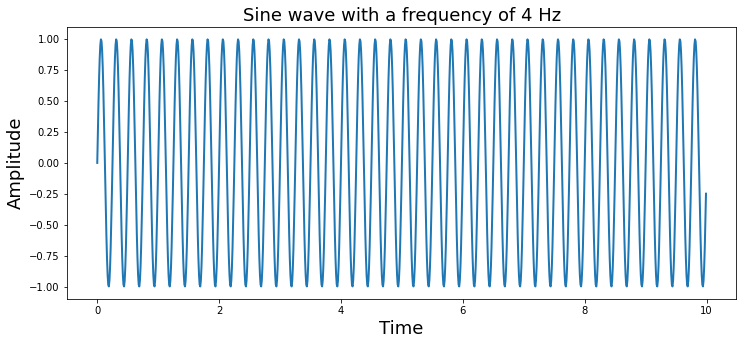

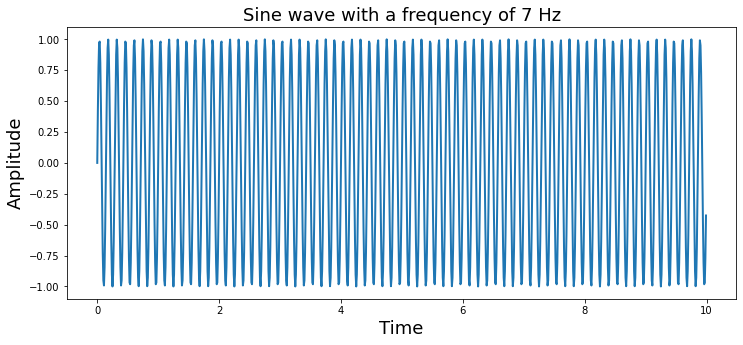

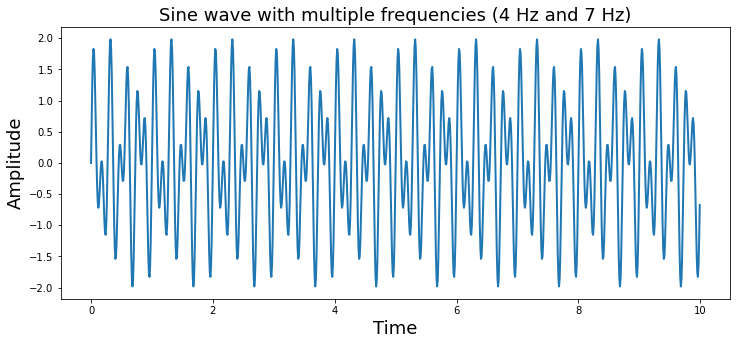

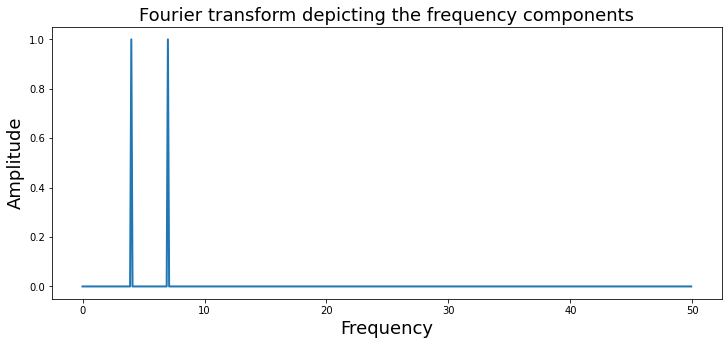

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# How many time points are needed i,e., Sampling Frequency
samplingFrequency   = 100;

# At what intervals time points are sampled
samplingInterval       = 1 / samplingFrequency;

# Begin time period of the signals
beginTime           = 0;

# End time period of the signals
endTime             = 10; 

# Frequency of the signals
signal1Frequency     = 4;
signal2Frequency     = 7;

# Time points
time        = np.arange(beginTime, endTime, samplingInterval);

# Create two sine waves
amplitude1 = np.sin(2*np.pi*signal1Frequency*time)
amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

plt.figure(figsize=(12, 5))
plt.plot(time, amplitude1, linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.title('Sine wave with a frequency of 4 Hz', fontsize=18)

plt.figure(figsize=(12, 5))
plt.plot(time, amplitude2, linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.title('Sine wave with a frequency of 7 Hz', fontsize=18)


# Add the sine waves
amplitude = amplitude1 + amplitude2

plt.figure(figsize=(12, 5))
plt.plot(time, amplitude, linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.title('Sine wave with multiple frequencies (4 Hz and 7 Hz)', fontsize=18)


# Frequency domain representation
fourierTransform = 2*np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency


tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod


plt.figure(figsize=(12, 5))
plt.plot(frequencies, abs(fourierTransform), linewidth=2)
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.title('Fourier transform depicting the frequency components', fontsize=18)



## Audio sampling and quantization

In [ ]:
!wget -nc https://drwuz.com/CSC3160/materials/audio/xueyao_singing.wav

!pip install pysoundfile
!pip install bitstring
!pip install librosa

File ‘xueyao_singing.wav’ already there; not retrieving.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Sampling rate: 48000 samples/second
Signal size: 378429 samples
Signal duration: 7.884 seconds


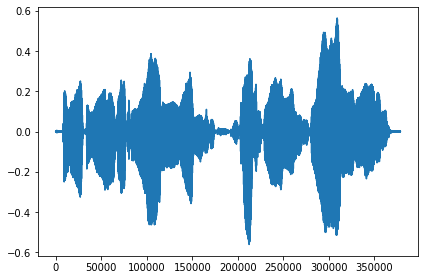

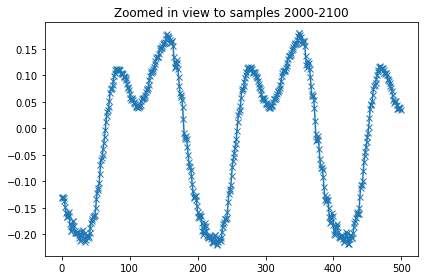

In [ ]:
import soundfile
import matplotlib.pyplot as plt
import IPython
audio_signal, sampling_rate = soundfile.read('xueyao_singing.wav')
print('Sampling rate: {} samples/second'.format(sampling_rate))
print('Signal size: {} samples'.format(audio_signal.shape[0]))
print('Signal duration: {:.3f} seconds'.format(audio_signal.shape[0] / sampling_rate))
plt.plot(audio_signal)
plt.tight_layout()
plt.figure()
plt.plot(audio_signal[50000:50500], marker='x')
plt.title('Zoomed in view to samples 2000-2100')
plt.tight_layout()


IPython.display.Audio('xueyao_singing.wav')


### Resampling

In [ ]:
import librosa
import IPython.display as ipd

for resample_rate in [4000, 8000, 16000, sampling_rate]:
  resampled_signal = librosa.resample(audio_signal.squeeze(), orig_sr=sampling_rate, target_sr=resample_rate, res_type="kaiser_best")
  
  print("Audio at sampling rate: ", resample_rate)
  ipd.display(ipd.Audio(resampled_signal, rate=resample_rate))


Audio at sampling rate:  4000


Audio at sampling rate:  8000


Audio at sampling rate:  16000


Audio at sampling rate:  48000


Text(0, 0.5, 'Amplitude')

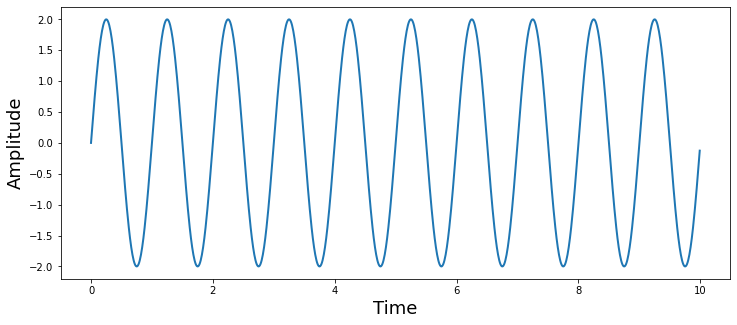

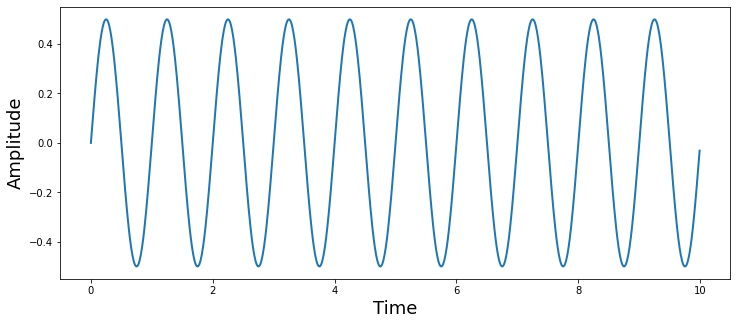

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# How many time points are needed i,e., Sampling Frequency
samplingFrequency   = 100;

# At what intervals time points are sampled
samplingInterval       = 1 / samplingFrequency;

# Begin time period of the signals
beginTime           = 0;

# End time period of the signals
endTime             = 10; 

# Frequency of the signals
signal1Frequency     = 1;
signal2Frequency     = 7;

# Time points
time        = np.arange(beginTime, endTime, samplingInterval);

# Create two sine waves
amplitude1 = 2*np.sin(2*np.pi*signal1Frequency*time)
amplitude2 = 0.5*np.sin(2*np.pi*signal1Frequency*time)

plt.figure(figsize=(12, 5))
plt.plot(time, amplitude1, linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
# plt.title('Sine wave with a frequency of 4 Hz', fontsize=18)

plt.figure(figsize=(12, 5))
plt.plot(time, amplitude2, linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
# plt.title('Sine wave with a frequency of 7 Hz', fontsize=18)

